In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
df.shape

(1338, 7)

the data has got 7 columns of which charges is the label and the rest age, sex, bmi,children, smoker and region are the features of the data

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We can see the datatypes of the data are proper and we have object type data, int and float type of data as well

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

the data has no nulls and the data seems to be proper as well so we need not do much with the data for cleaning. we now have to go for EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


We can see the sex and smoker columns are having binary data and the region data has got only 4 values. so that is also a categorical data. we will check if we can get some relation of region with the smoker column or the bmi column. If so we will keep the column else if there is not much relation of the region with charges then we **might** drop the column altogether. 

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


the age column shows a good distribution with the quartiles at almost same difference. bmi also has a good distribution and do not show any presence of outliers in the initial observation. The children column might have outliers but we will decide on what is to be done with the column after further analysis. Charges is our Label.
**we will now segregate the data as categorial and numerical

In [11]:
cat_col = []
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
    else:
        num_col.append(i)
print("categorical column = ",cat_col)
print("numerical column = ", num_col)

categorical column =  ['sex', 'smoker', 'region']
numerical column =  ['age', 'bmi', 'children', 'charges']


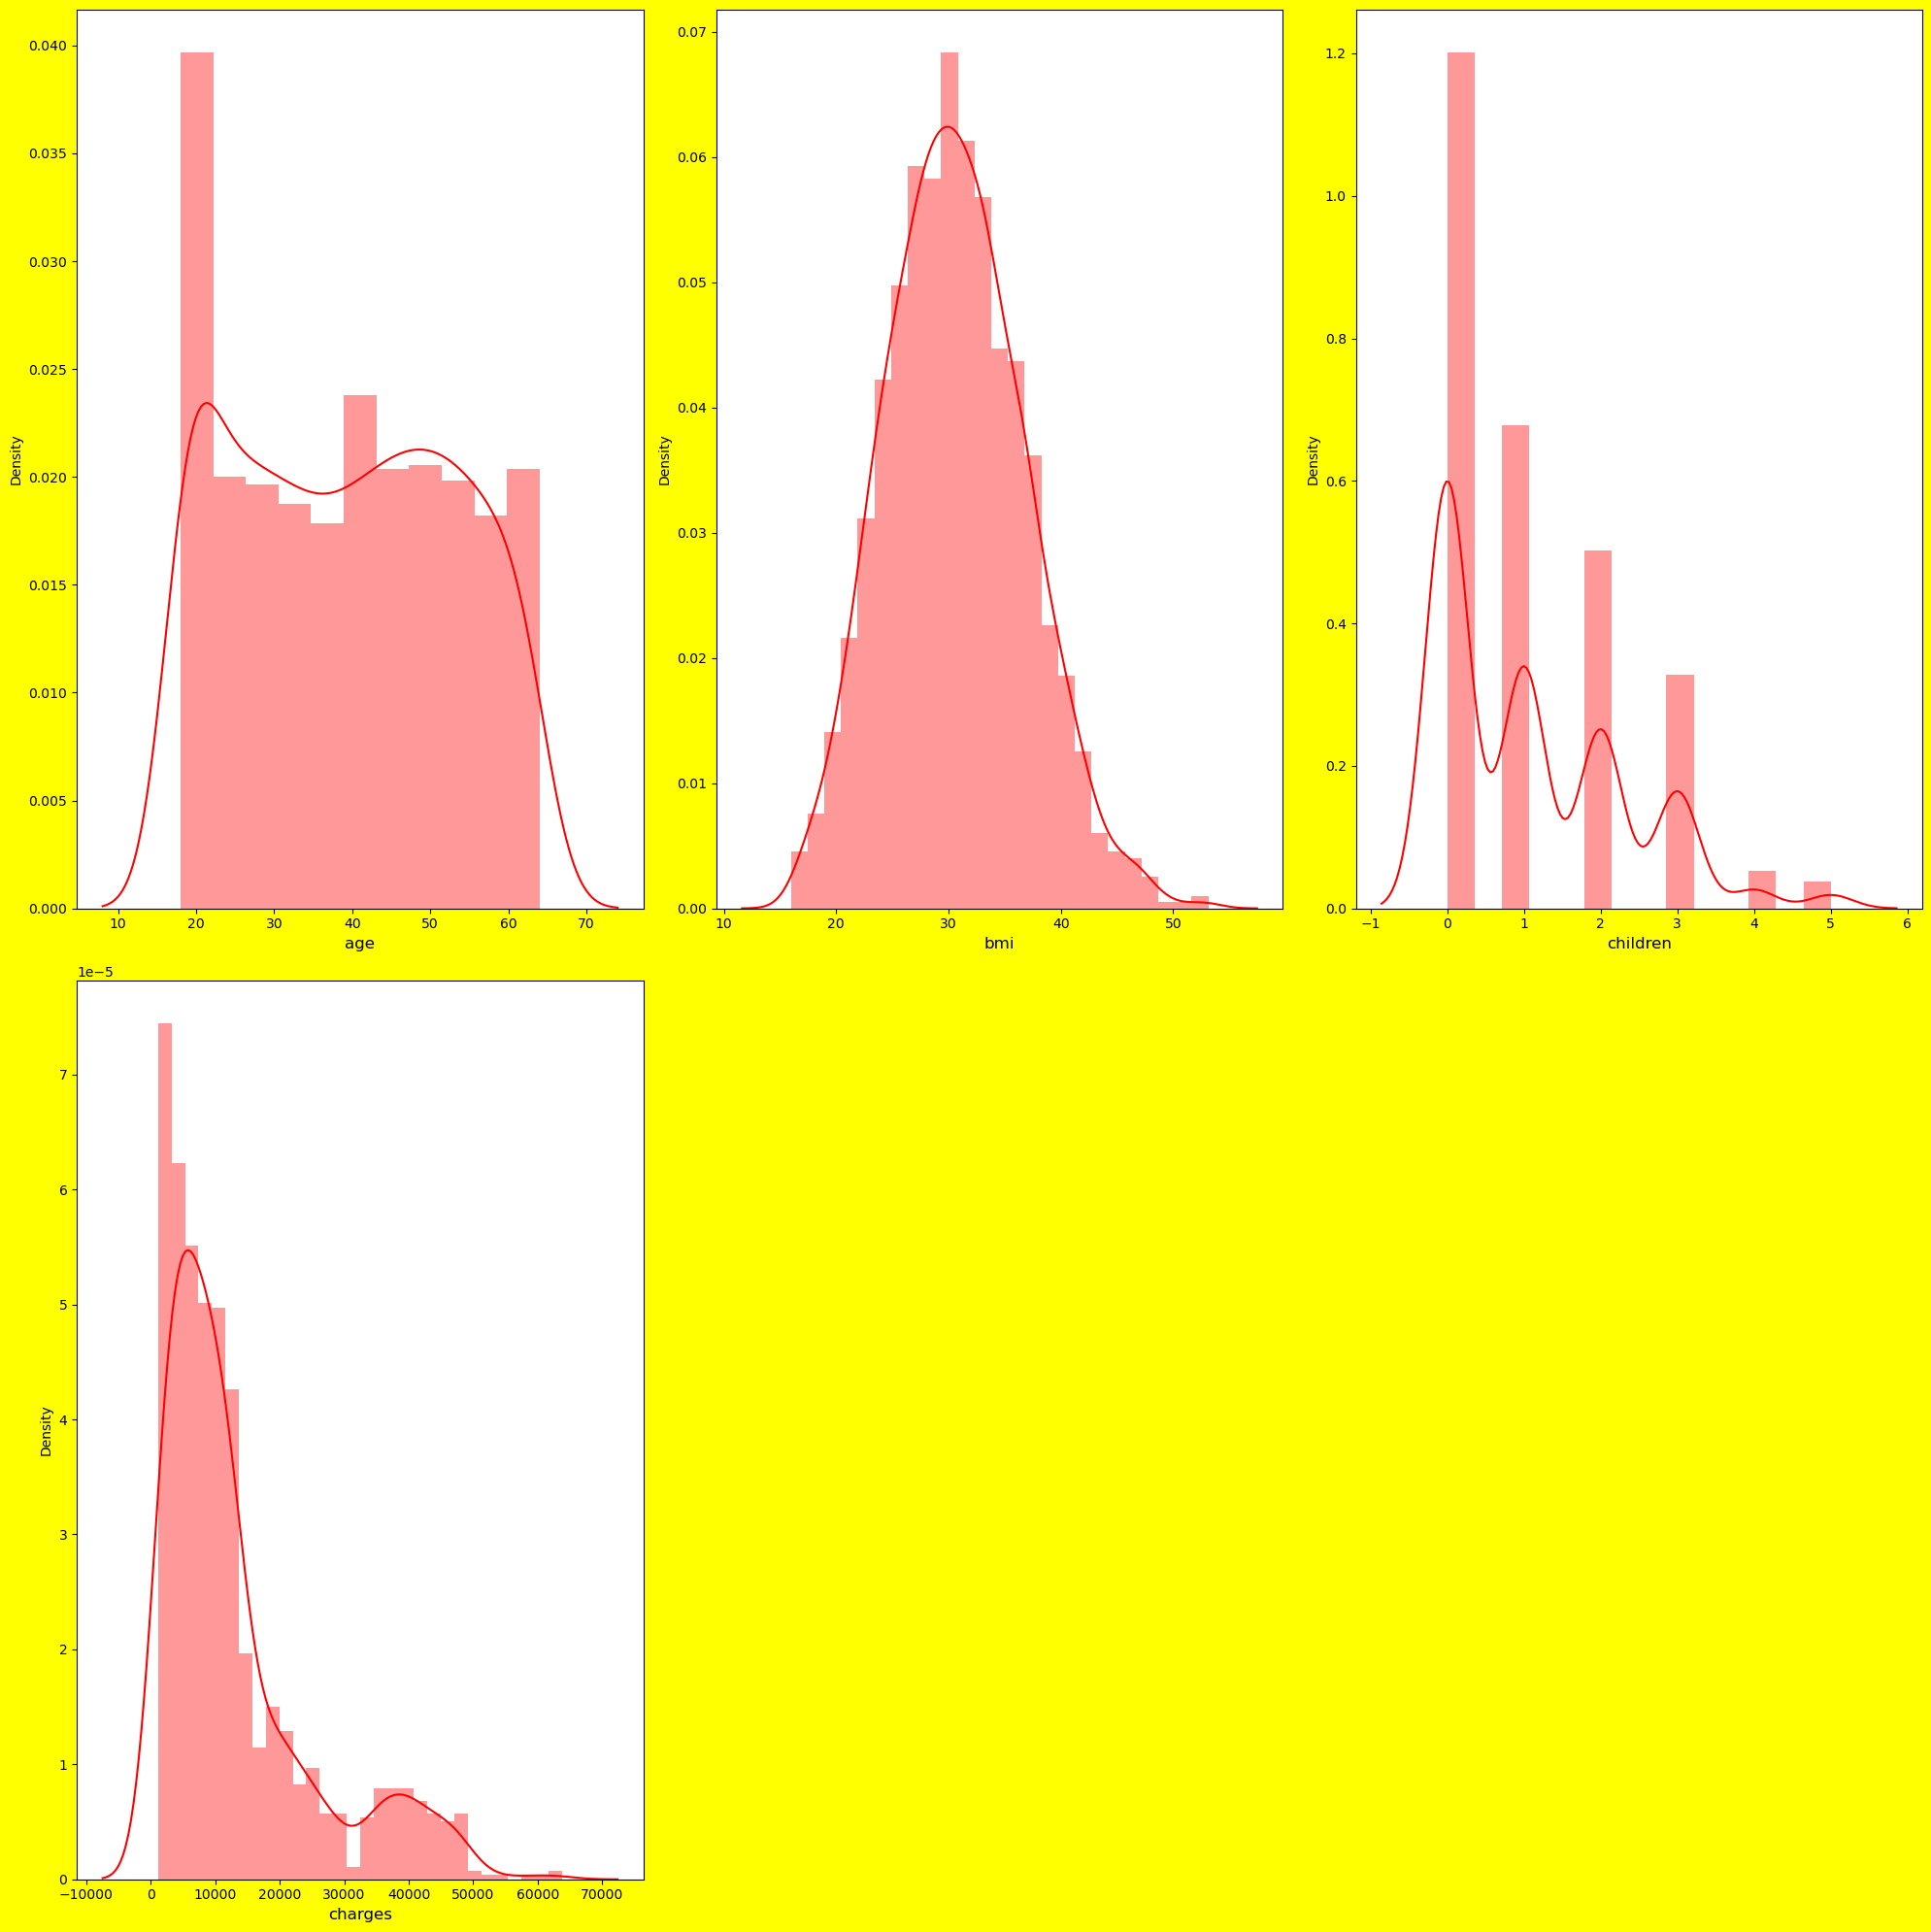

In [12]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in num_col:
    if plotnumber <= 7:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

In [13]:
# let us first use label encoder on sex and smoker columns
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df2 = lab_enc.fit_transform(df['sex'])
df['sex'] = df2
df3 = lab_enc.fit_transform(df['smoker'])
df['smoker'] = df3
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [14]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region       object
charges     float64
dtype: object

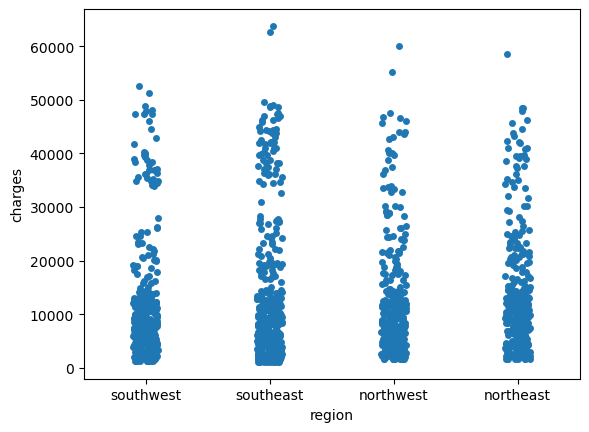

In [15]:
sns.stripplot(y = 'charges', x = 'region', data = df)
plt.show()

In [16]:
print(df['region'].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


the data for region seems to be distributed quite evenly. Southeast has the maximum number but there is not a huge difference which means we can still use label encoder and not ordinal encoder.

In [17]:
lab_enc = LabelEncoder()
df4 = lab_enc.fit_transform(df['region'])
df['region'] = df4
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [18]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

the data is now completely numerical

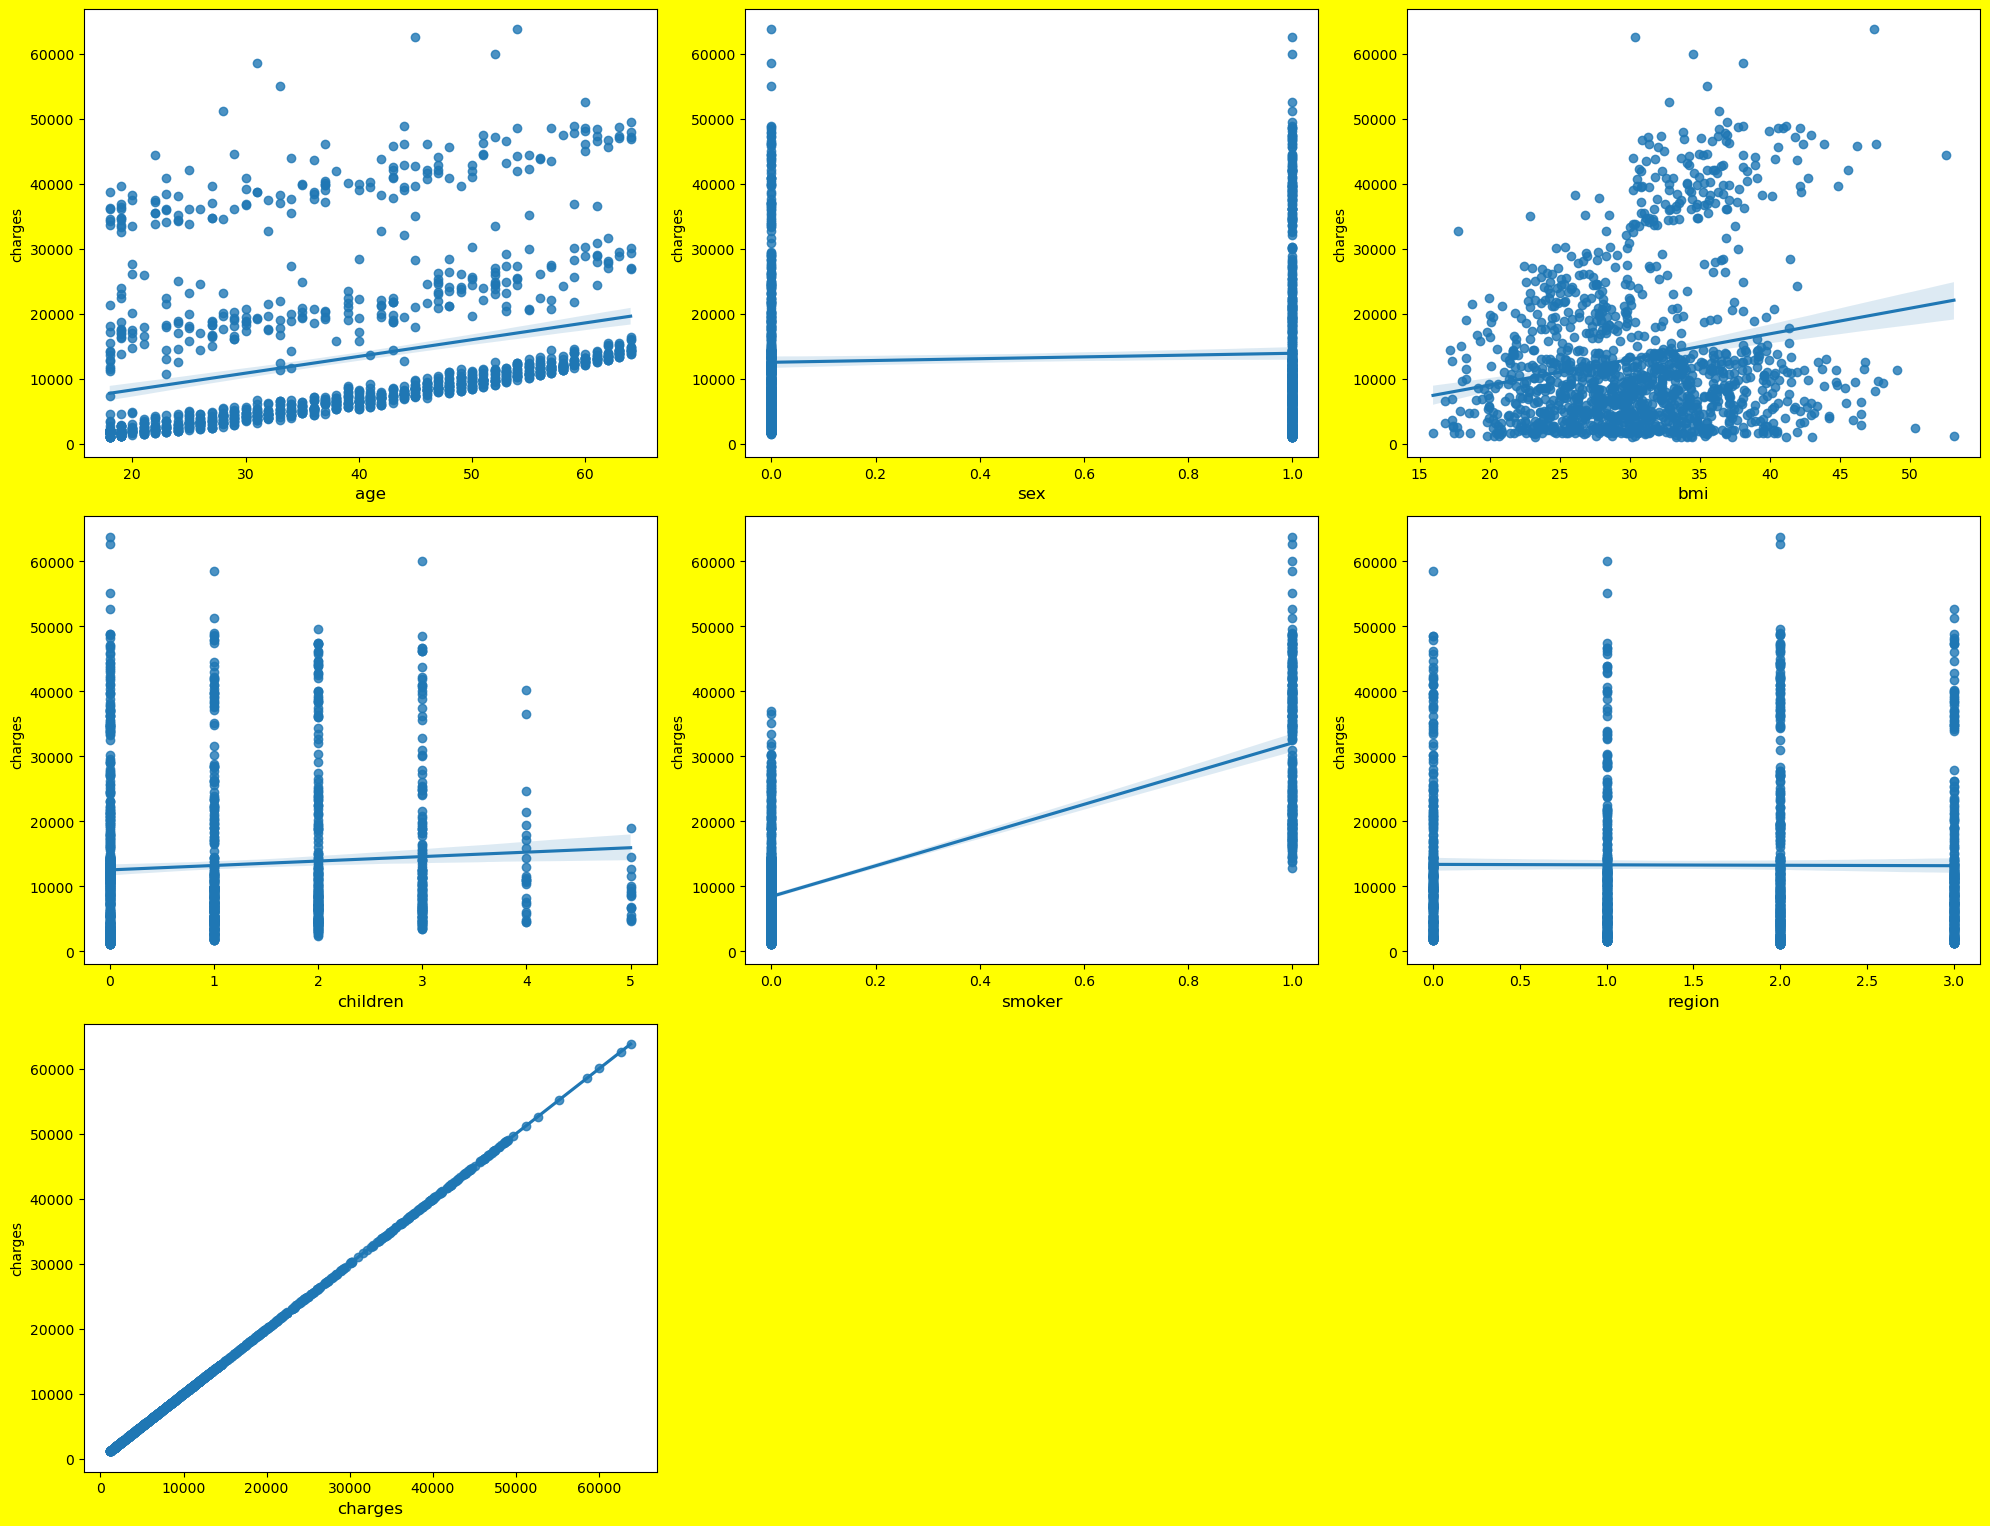

In [19]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.regplot(x=column,y='charges',data = df)
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

as expected the region feature does not show much relation with charges

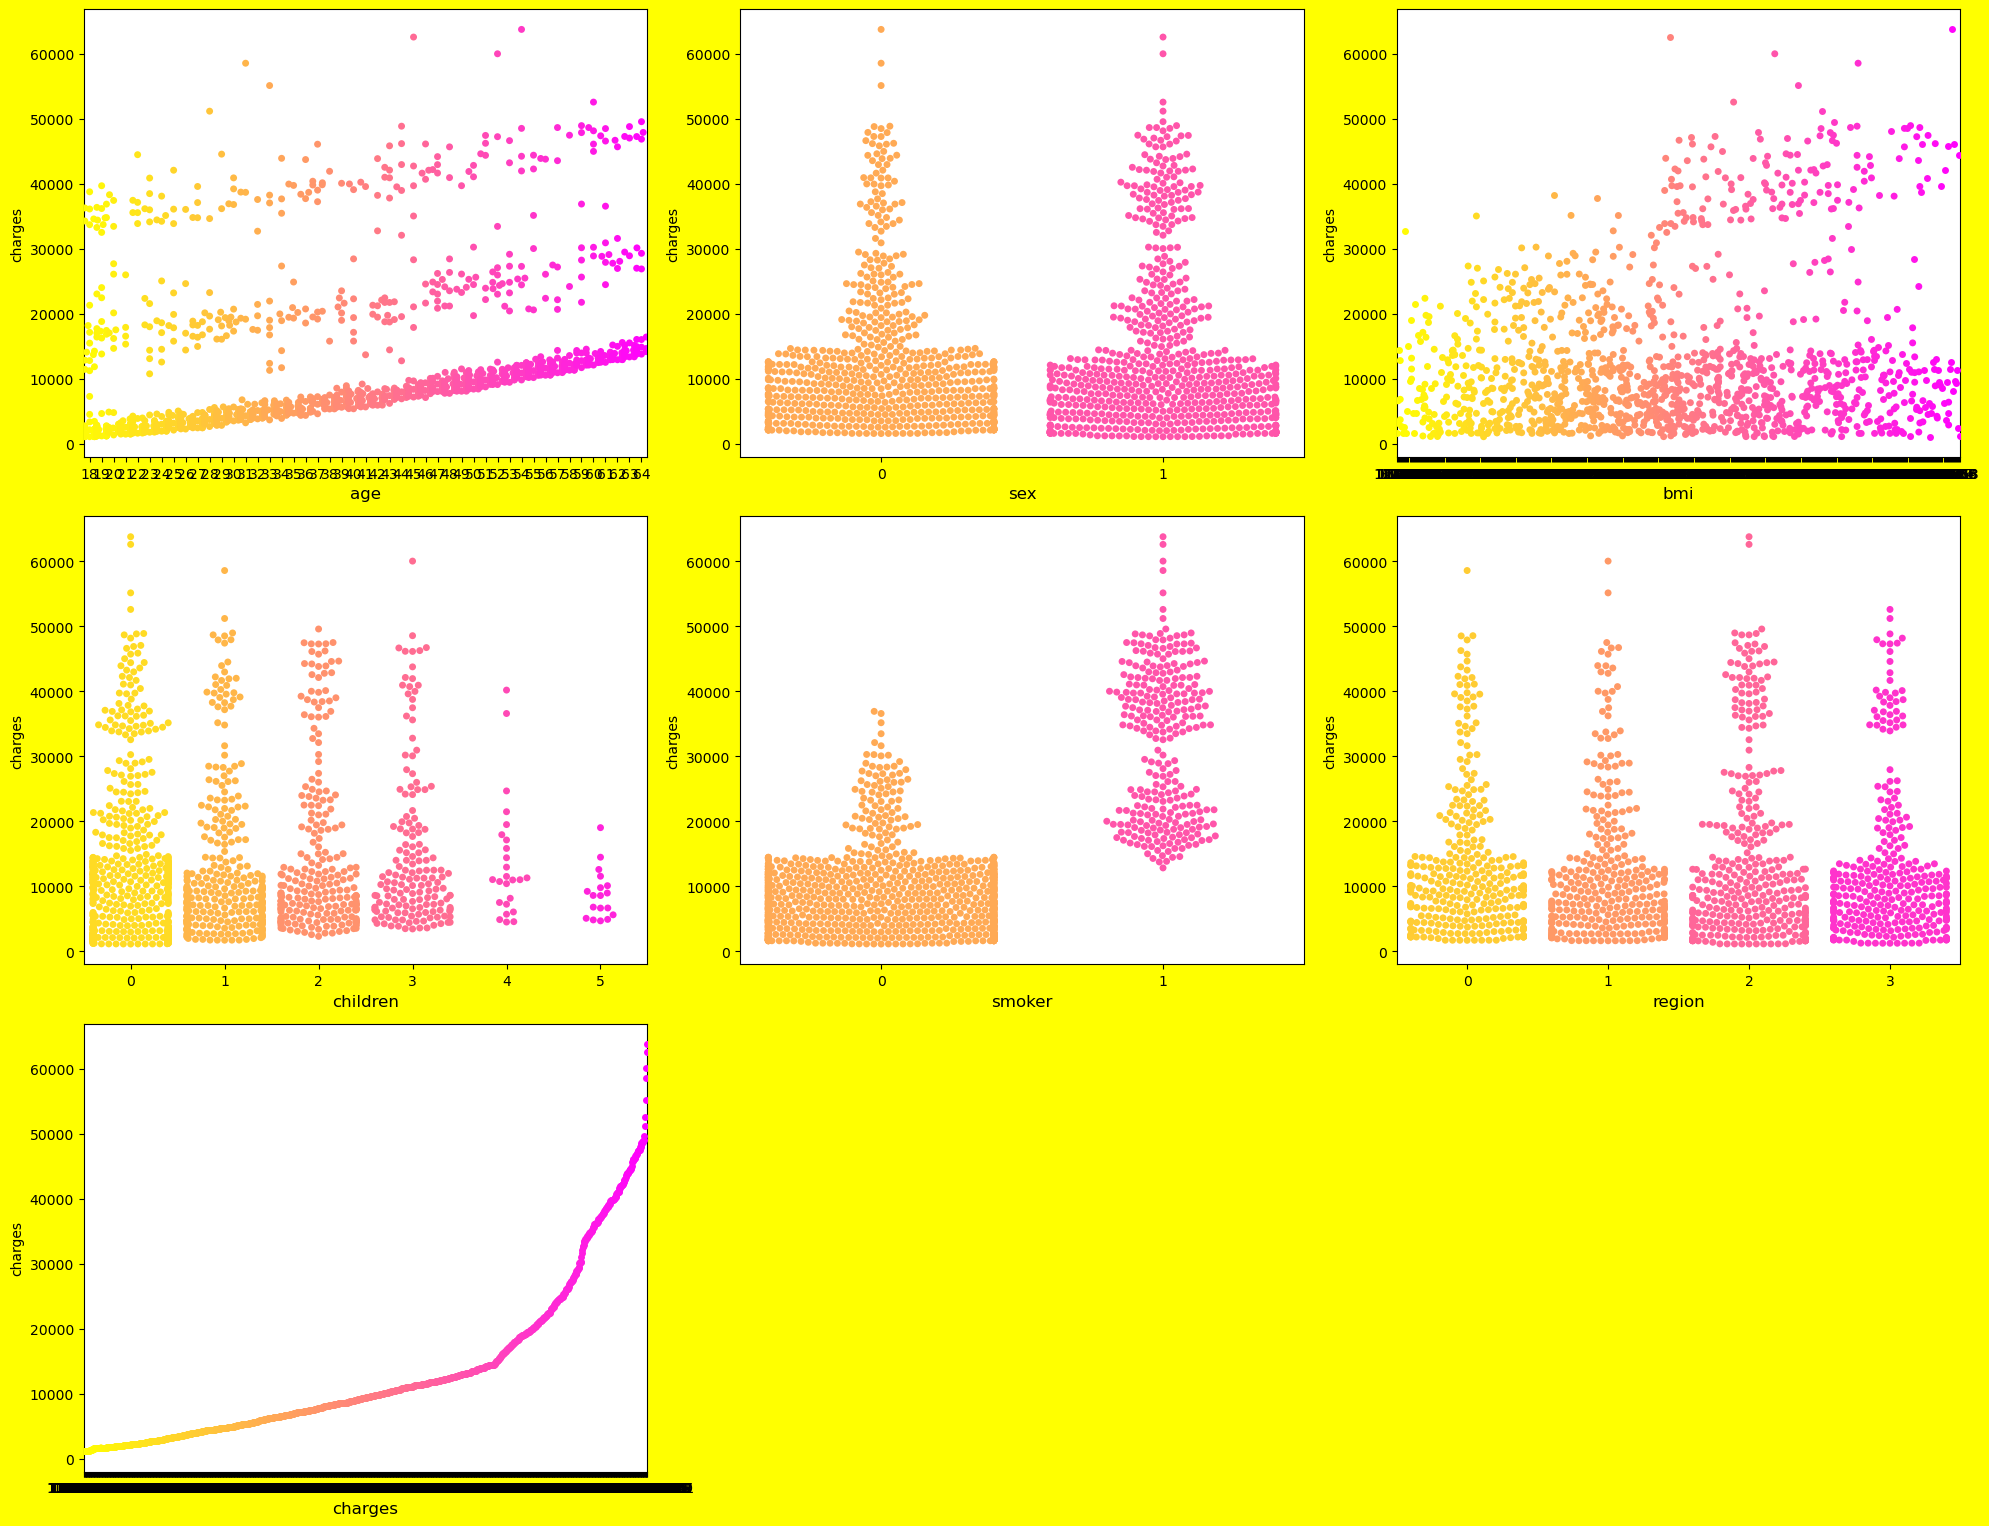

In [20]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.swarmplot(x=column,y='charges',data = df,palette = 'spring_r')
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

In the above table we can see that most of the charges has been around 10000 and that is consistent in almost all the features. so there is atleast this much expense. 
people both higher and lower in age have needed high claims and people higher in age have not needed very high claims.
Similarly people of both sex have needed almost the same amounts of claims like number and amount.
One thing very noticeable in bmi feature is that people above a certain index have had higher amounts of claims and almost the same number of claims in the range of 10000 for people of all bmi
people with 0 dependants have made a lot of claims where as people with more dependants seems to have less claims
non smokers have made more claims with less total expense where as number of smokers making claims might be less but have made higher claims so more charges.
all regions show similar trend nothing standing out
most charges are definitely around the 12000 mark. 

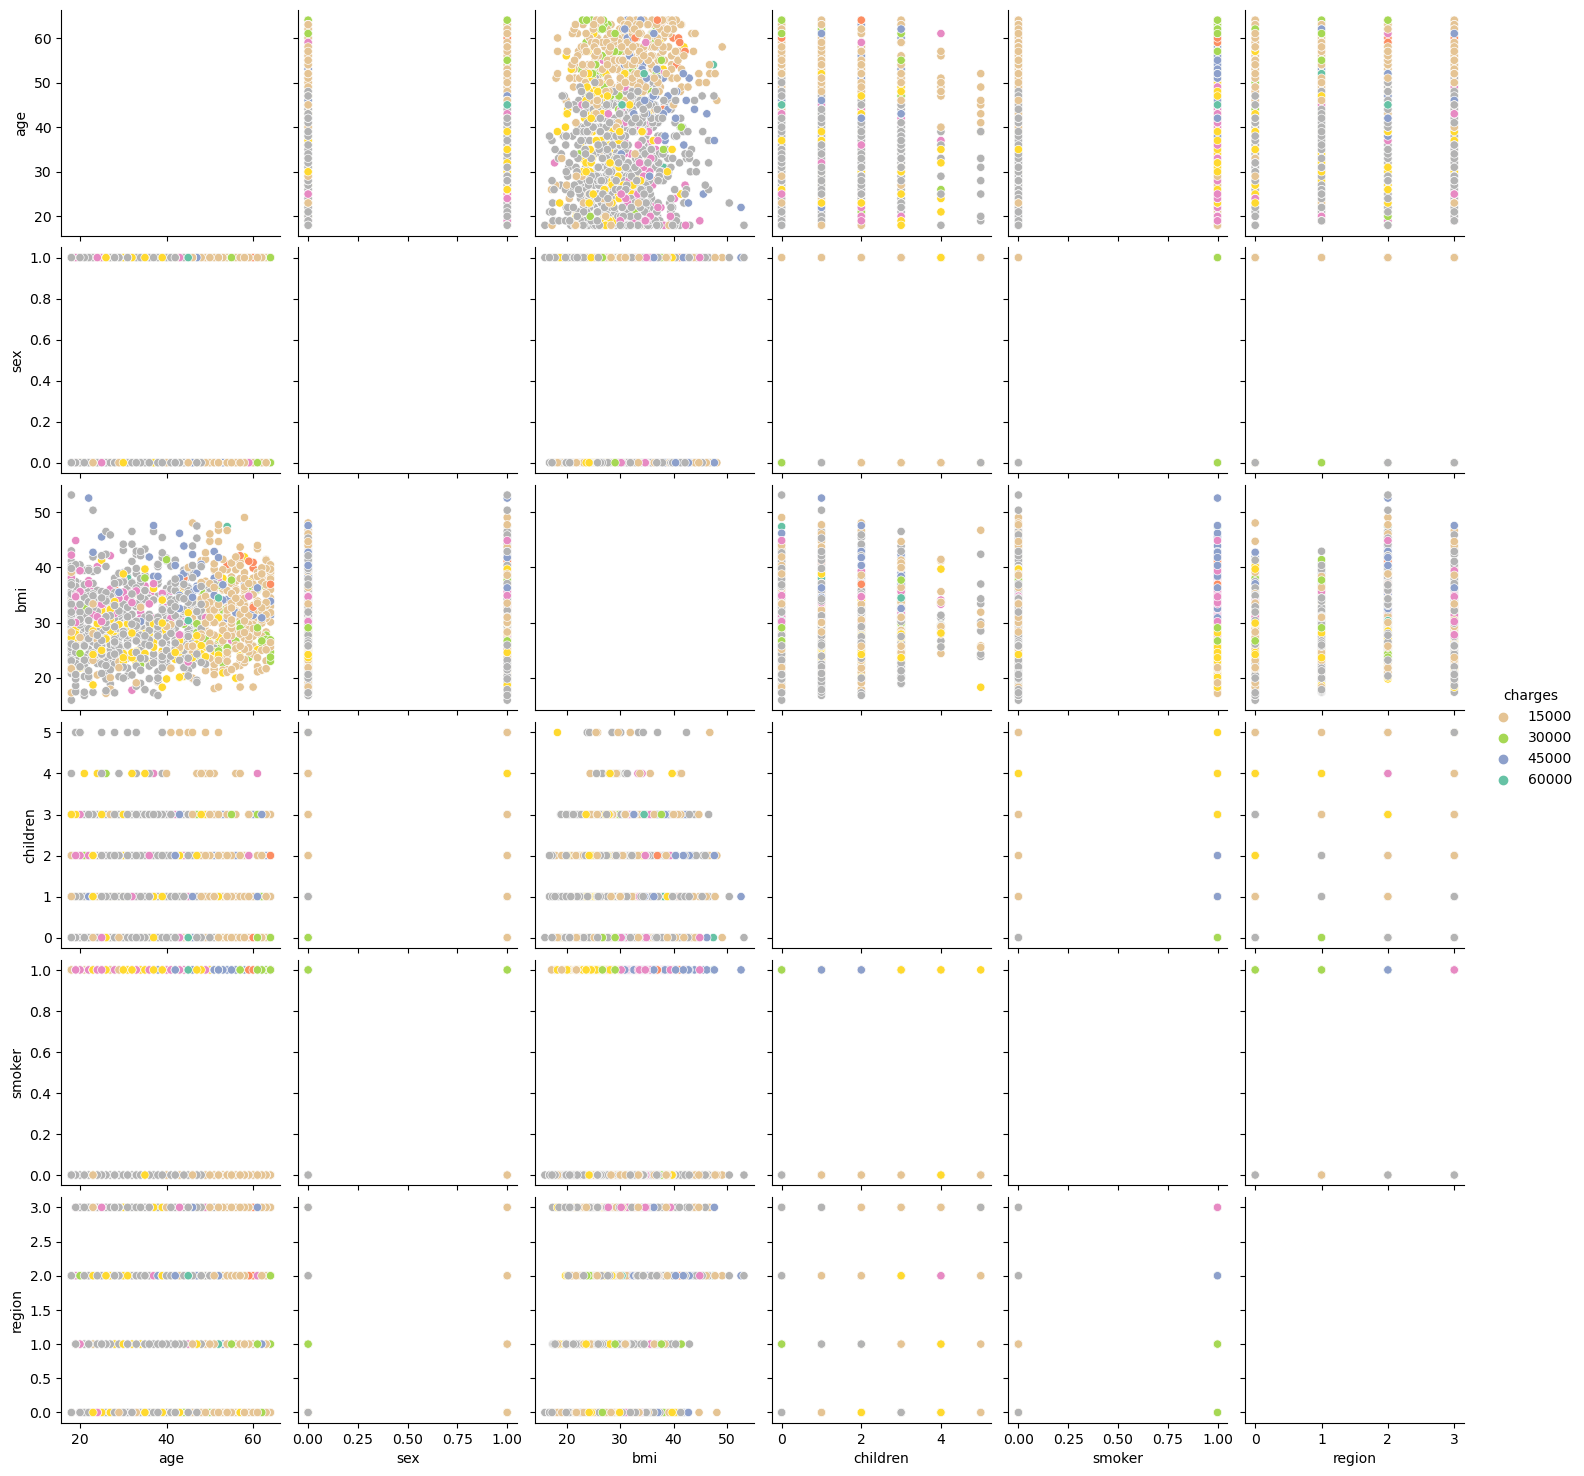

In [21]:
sns.pairplot(df,hue = 'charges',palette ='Set2_r')

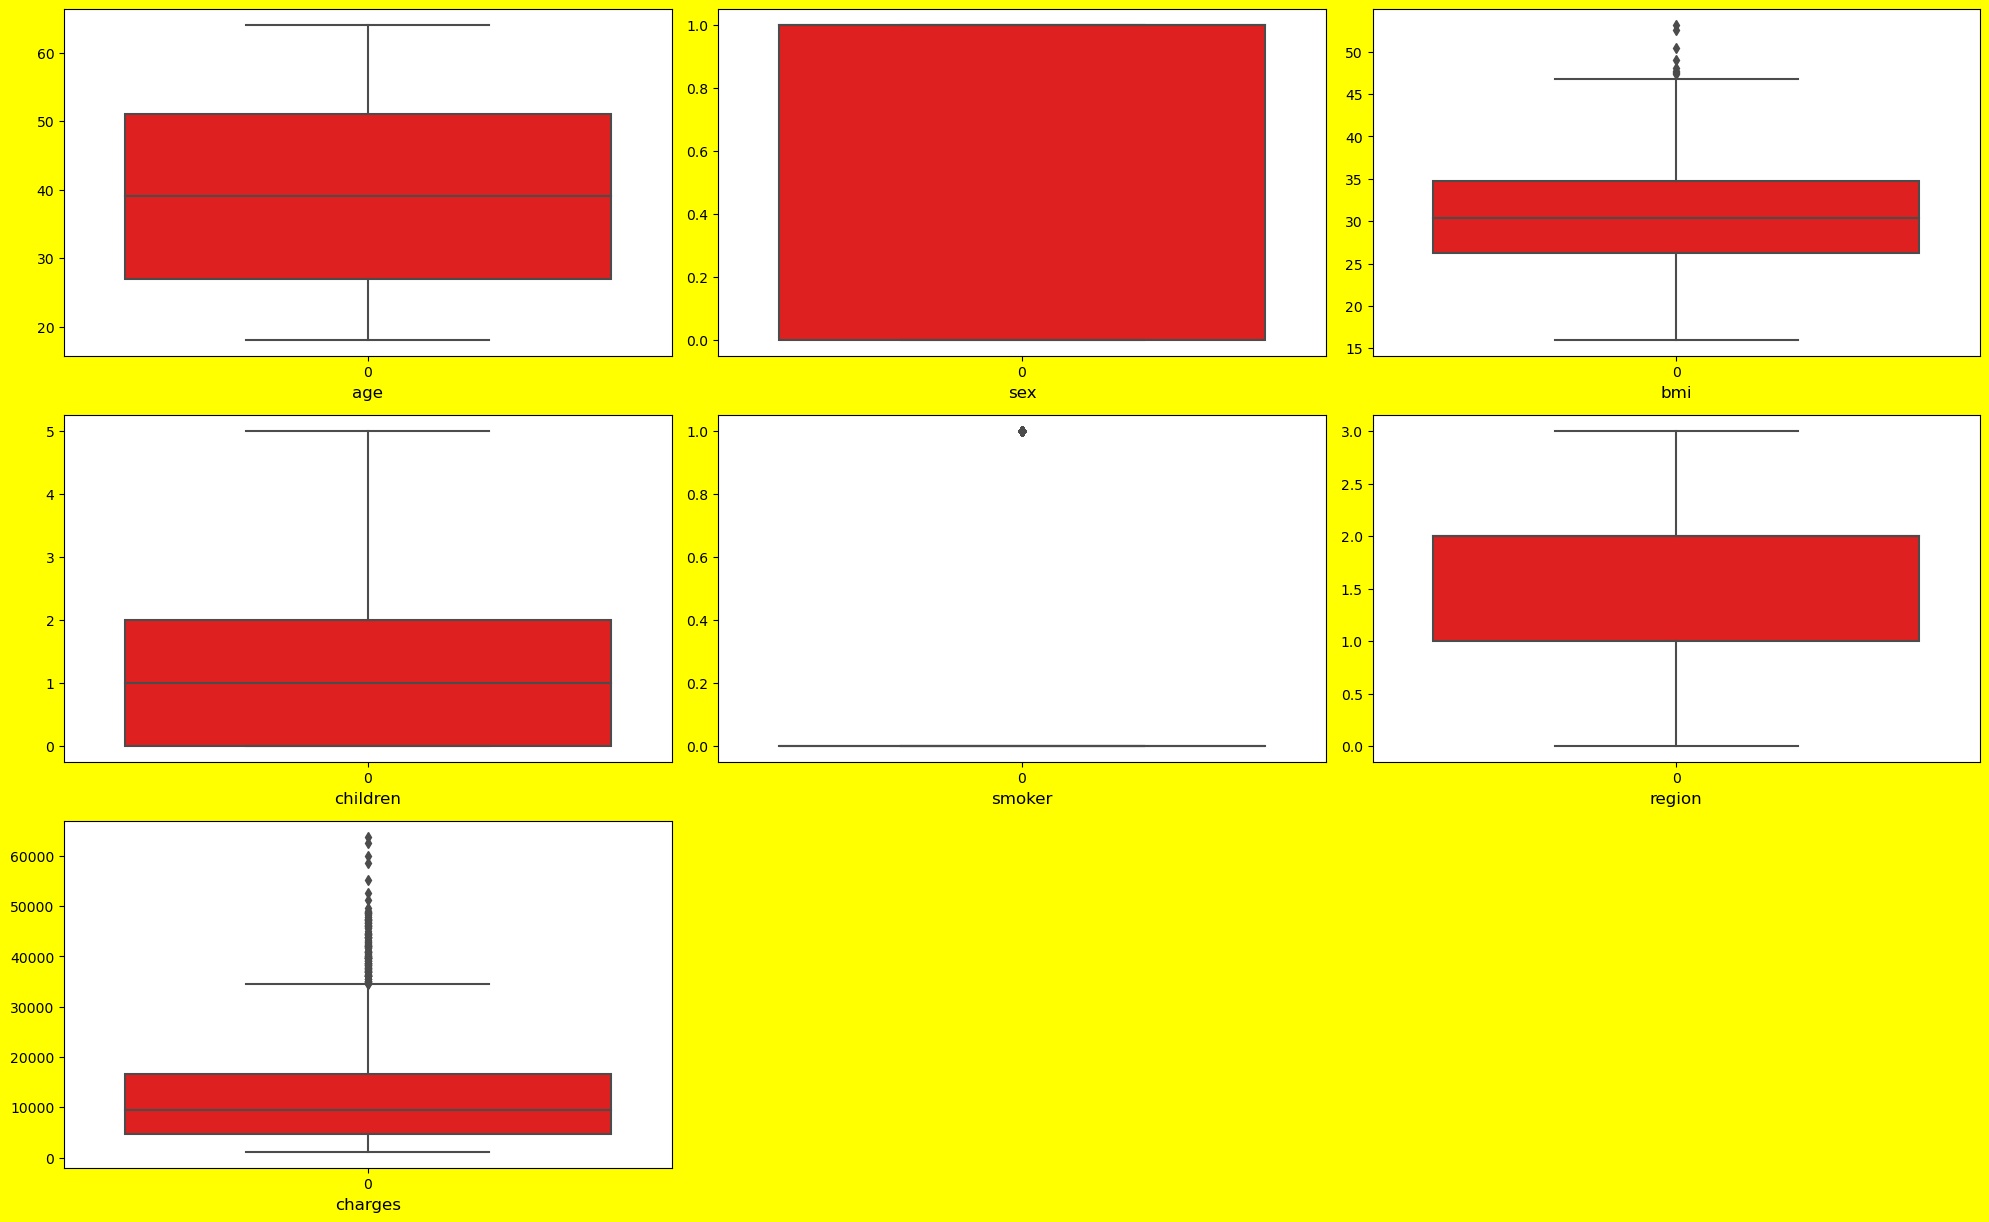

In [22]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

the outliers are only in bmi but they are negligible

In [23]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [24]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


there is not much correlation between the columns so no problem of multicollinearity. let us confirm it usin heatmap

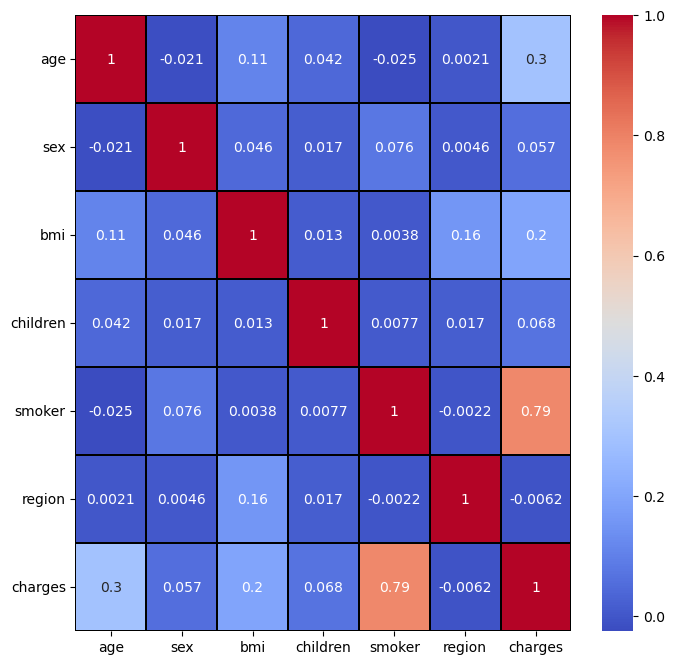

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),linewidth = 0.1,fmt = ".2g",annot = True,cmap = "coolwarm",linecolor = 'black')
plt.yticks(rotation = 0)
plt.show()

In [26]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

,VIF values,features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


the variance in the data seems to be very low as well

let us now begin Model building

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [30]:
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ",maxAccu , " at random state ", maxRs )

Best accuracy is  0.7969148510773545  at random state  122


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = maxRs)

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [33]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNN()
svr = SVR()

In [34]:
models = {'Linear Regression':lr,'Lasso':lasso,'Ridge':ridge,'Random Forest Regressor':rfr,'Extra tree regressor':etr,'Decision tree regressor':dtr,'KNN':knn,'SVR':svr}
for name, model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred_train = model.predict(x_train)
    print("following is the score of ",name)
    print("R2 score : ",r2_score(y_test,pred)*100)
    #print("R2 score on training data : ",r2_score(y_test,pred_train)*100)
    print("Mean absolute error : ",mean_absolute_error(y_test,pred))
    print("Mean squared error  : ",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    score = cross_val_score(model,x,y,)
    print(score)
    print(score.mean())
    #sc_mean = score.mean()
    print("difference between r2 score and cross val score : ", r2_score(y_test,pred)-score.mean())
    print("\n\n")

following is the score of  Linear Regression
R2 score :  79.69148510773545
Mean absolute error :  4105.816764662921
Mean squared error  :  32395435.89201717
Root mean squared error : 5691.698858163279
[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
difference between r2 score and cross val score :  0.04965890371925907



following is the score of  Lasso
R2 score :  79.69110621782208
Mean absolute error :  4105.706716551995
Mean squared error  :  32396040.284015484
Root mean squared error : 5691.75195208079
[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
difference between r2 score and cross val score :  0.0496501272407911



following is the score of  Ridge
R2 score :  79.68090043199342
Mean absolute error :  4107.693299553013
Mean squared error  :  32412320.19824328
Root mean squared error : 5693.181904545408
[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582405
difference between r2 score and cross val scor

from the above output we can confirm that random forest regressor has the highest accuracy with the best cross val score as well which is low although KNN has a better cross val but its accuracy is poorer compared to Random forest regressor. so we will select random forest regressor for our hyper parameter tuning.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
param = {
    'n_estimators' : range(100,500,10),
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_split' : range(2,5),
     'max_depth' : range(1,20)

}

rfr_cv = RandomizedSearchCV(estimator = rfr , param_distributions = param ,cv = 5, n_jobs = -1)
rfr_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 20),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': range(2, 5),
                                        'n_estimators': range(100, 500, 10)})

In [50]:
best_param = rfr_cv.best_params_
print(best_param)

{'n_estimators': 390, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 8}


In [53]:
model = RandomForestRegressor(n_estimators= 390, min_samples_split = 4, max_features = 'sqrt', max_depth = 8)
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)
score = cross_val_score(model,x,y)
print(score)
print(score.mean())
print("difference between r2 score and cross val score : ", r2_score(y_test,pred)-score.mean())

88.27942869021052
[0.86903136 0.80169127 0.87465859 0.84234508 0.85854285]
0.849253827751809
difference between r2 score and cross val score :  0.03354045915029624


the model with the new parameters is giving a better accuracy with better cross val score as well. And so dis will be taken as our final model.

In [54]:
final_model = RandomForestRegressor(n_estimators= 390, min_samples_split = 4, max_features = 'sqrt', max_depth = 8)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

88.31367412619933


In [55]:
import pickle
pickle.dump(final_model,open('rfr_model','wb'))